In [18]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

movie = pd.read_csv('movie2.csv')
movie

,imdb_title_id,title,original_title,year,date_published,month_published,duration,country,language,directors_rating,...,Thriller,Fantasy,Romance,Sci-Fi,Mystery,War,Western,Music,Sport,History
0,tt0035423,Kate & Leopold,Kate & Leopold,2001,2002/4/5,4,118,USA,"English, French",7.70,...,0,1,1,0,0,0,0,0,0,0
1,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,2018/11/2,11,122,"France, Iran, USA","English, German",7.85,...,0,0,0,0,0,0,0,0,0,0
2,tt0085953,Mo tai,Mo tai,2019,2019/10/22,10,84,Hong Kong,Cantonese,5.70,...,0,0,0,0,0,0,0,0,0,0
3,tt0088751,The Naked Monster,The Naked Monster,2005,2005/4/22,4,100,USA,English,5.98,...,0,0,0,1,0,0,0,0,0,0
4,tt0096056,Crime and Punishment,Crime and Punishment,2002,2002/6/1,6,126,"Poland, Russia, USA","English, Polish",5.73,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43876,tt9903716,Jessie,Jessie,2019,2019/3/15,3,106,India,Telugu,NaN,...,1,0,0,0,0,0,0,0,0,0
43877,tt9905412,Ottam,Ottam,2019,2019/3/8,3,120,India,Malayalam,NaN,...,0,0,0,0,0,0,0,0,0,0
43878,tt9905462,Pengalila,Pengalila,2019,2019/3/8,3,111,India,Malayalam,7.17,...,0,0,0,0,0,0,0,0,0,0
43879,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019/3/8,3,130,India,Malayalam,NaN,...,0,0,0,0,0,0,0,0,0,0


In [19]:
from sklearn import datasets
movie = pd.read_csv('movie2.csv')
movie
movie.dropna(inplace = True)
from sklearn.model_selection import train_test_split

x = movie[['duration','directors_rating','actors_rating']].values
y = movie['avg_vote'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 40)

regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)

y_pred = regr.predict(x_test)

print('duration','directors_rating','actors_rating')
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

duration directors_rating actors_rating
Coefficients: [0.01002687 0.41241398 0.53470853]
Intercept: -1.484184135011029


In [20]:
print (y_pred)

[6.66082127 5.71160519 5.54205902 ... 5.60695282 7.11339857 5.76935974]


In [21]:
import math
err = y_pred - y_test
print(err)
print('The RMSE(root mean squared error) is:')
MRSE  =  math.sqrt(np.sum(np.square(err)) / y_pred.size)
print(MRSE)

[-0.03917873 -0.18839481 -1.05794098 ... -0.49304718 -0.38660143
 -0.93064026]
The RMSE(root mean squared error) is:
1.0418684651610377


In [22]:
from sklearn import datasets
movie = pd.read_csv('movie2.csv')
movie
movie.dropna(inplace = True)
from sklearn.model_selection import train_test_split

x = movie[['directors_rating','actors_rating']].values
y = movie['avg_vote'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 40)

regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)

y_pred = regr.predict(x_test)

print('directors_rating','actors_rating')
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

directors_rating actors_rating
Coefficients: [0.44407917 0.58223428]
Intercept: -0.9770169404292997


In [23]:
print (y_pred)

[6.68826086 5.55023748 5.55082976 ... 5.77050152 6.54517054 5.88448013]


In [24]:
import math
err = y_pred - y_test
print(err)
print('The RMSE(root mean squared error) is:')
MRSE  =  math.sqrt(np.sum(np.square(err)) / y_pred.size)
print(MRSE)

[-0.01173914 -0.34976252 -1.04917024 ... -0.32949848 -0.95482946
 -0.81551987]
The RMSE(root mean squared error) is:
1.0646069056021314


(6738, 2)
(6738,)
(50, 50)


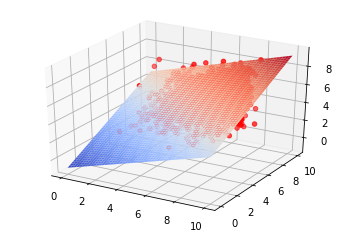

In [25]:
print(x_test.shape)
print(y_test.shape)
fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.gca(projection = '3d')
ax.scatter(x_test[:,0],x_test[:,1],y_test,color = 'red')

a = np.linspace(0,10,50)
b = np.linspace(0,10,50)

from matplotlib import cm
X,Y = np.meshgrid(a,b)
Z = regr.coef_[0]*X+regr.coef_[1]*Y+regr.intercept_
print(Z.shape)
#Axes3D.plot_surface(X,Y,Z, rstride = 1, cstride = 1)
ax.plot_surface(X,Y,Z, rstride = 1, cstride = 1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
plt.show()

(6738, 2)
(6738,)
(50, 50)


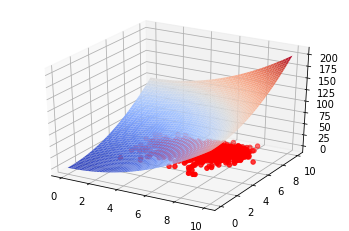

In [26]:
print(x_test.shape)
print(y_test.shape)
fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.gca(projection = '3d')
ax.scatter(x_test[:,0],x_test[:,1],y_test,color = 'red')

a = np.linspace(0,10,50)
b = np.linspace(0,10,50)

from matplotlib import cm
X,Y = np.meshgrid(a,b)
Z = X**2+Y**2
print(Z.shape)
#Axes3D.plot_surface(X,Y,Z, rstride = 1, cstride = 1)
ax.plot_surface(X,Y,Z, rstride = 1, cstride = 1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
plt.show()

In [27]:
from sklearn import datasets
movie = pd.read_csv('movie2.csv')
movie
movie.dropna(inplace = True)
from sklearn.model_selection import train_test_split

x = movie[['duration','directors_rating','actors_rating']].values
y = movie['votes'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 40)

regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)

y_pred = regr.predict(x_test)

print('duration','directors_rating','actors_rating')
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

duration directors_rating actors_rating
Coefficients: [  545.49944612  7750.6496403  16796.87348741]
Intercept: -198990.75747293438


In [28]:
print (y_pred)

[44583.06523587 22014.78814931 12353.53712719 ...  7157.20167212
 69411.90965359 16400.47813196]


In [29]:
import math
err = y_pred - y_test
print(err)
print('The RMSE(root mean squared error) is:')
MRSE  =  math.sqrt(np.sum(np.square(err)) / y_pred.size)
print(MRSE)

[43199.06523587 21453.78814931 11936.53712719 ...  6946.20167212
 69237.90965359 15604.47813196]
The RMSE(root mean squared error) is:
72562.88984437587


In [30]:
from sklearn import datasets
movie = pd.read_csv('movie2.csv')
movie
movie.dropna(inplace = True)
from sklearn.model_selection import train_test_split

x = movie[['directors_rating','actors_rating']].values
y = movie['votes'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 40)

regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)

y_pred = regr.predict(x_test)

print('directors_rating','actors_rating')
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

directors_rating actors_rating
Coefficients: [ 9473.3552215  19382.45331435]
Intercept: -171398.95309689618


In [31]:
print (y_pred)

[46075.88216194 13235.77712486 12830.69834372 ... 16054.86666826
 38498.165775   22663.46038948]


In [32]:
import math
err = y_pred - y_test
print(err)
print('The RMSE(root mean squared error) is:')
MRSE  =  math.sqrt(np.sum(np.square(err)) / y_pred.size)
print(MRSE)

[44691.88216194 12674.77712486 12413.69834372 ... 15843.86666826
 38324.165775   21867.46038948]
The RMSE(root mean squared error) is:
73219.99403271626


(6738, 2)
(6738,)
(50, 50)


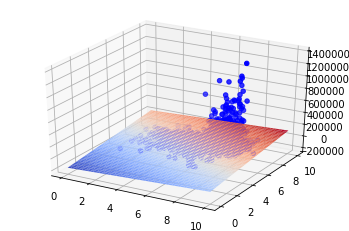

In [33]:
print(x_test.shape)
print(y_test.shape)
fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.gca(projection = '3d')
ax.scatter(x_test[:,0],x_test[:,1],y_test,color = 'blue')

a = np.linspace(0,10,50)
b = np.linspace(0,10,50)

from matplotlib import cm
X,Y = np.meshgrid(a,b)
Z = regr.coef_[0]*X+regr.coef_[1]*Y+regr.intercept_
print(Z.shape)
#Axes3D.plot_surface(X,Y,Z, rstride = 1, cstride = 1)
ax.plot_surface(X,Y,Z, rstride = 1, cstride = 1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
plt.show()

(6738, 2)
(6738,)
(50, 50)


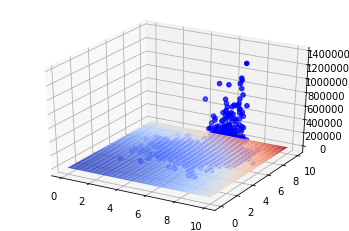

In [34]:
print(x_test.shape)
print(y_test.shape)
fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.gca(projection = '3d')
ax.scatter(x_test[:,0],x_test[:,1],y_test,color = 'blue')

a = np.linspace(0,10,50)
b = np.linspace(0,10,50)

from matplotlib import cm
X,Y = np.meshgrid(a,b)
Z = X**2+Y**2
print(Z.shape)
#Axes3D.plot_surface(X,Y,Z, rstride = 1, cstride = 1)
ax.plot_surface(X,Y,Z, rstride = 1, cstride = 1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
plt.show()